## Evaluation

Ce notebook est à compléter, avec code et commentaires soigneusement rédigés.

Le fichier "signals.npz" contient des réalisations de trois [processus aléatoires](https://fr.wikipedia.org/wiki/Processus_stochastique) distincts sous la forme de trois tableaux: `signaux1`, `signaux2` et `signaux3`. Chaque processus génère des [séries temporelles](https://fr.wikipedia.org/wiki/S%C3%A9rie_temporelle) de 256 valeurs. Chaque tableau `signaux1`, `signaux2` et `signaux3` contient 2048 réalisations du processus, et consiste donc en une matrice de 256 lignes de 2048 colonnes.

### Question

1. Tracer quelques séries temporelles générées par chacun des trois processus. Commenter.
2. Pour chaque signal, mesurer la déviation standard (c.à-d. la racine carré de la variance empirique) des 256*2048 les valeurs prises par l'ensemble des séries temporelles.
3. Un seul de ces processus est stationnaire [au sens large] (ou [faible]) (https://fr.wikipedia.org/wiki/Stationnarit%C3%A9_d%27une_s%C3%A9rie_temporelle#D%C3%A9finition_faible_de_la_stationnarit%C3%A9). Lequel? On rappellera la définition de la stationnarité au sens large, et l'on argumentera soigneusement son choix à partir des moyennes et matrices de covariance empiriques sur les données.

In [20]:
## SOLUTION A PARTIR DE CE POINT

# Modules

import numpy as np
import matplotlib.pyplot as plt

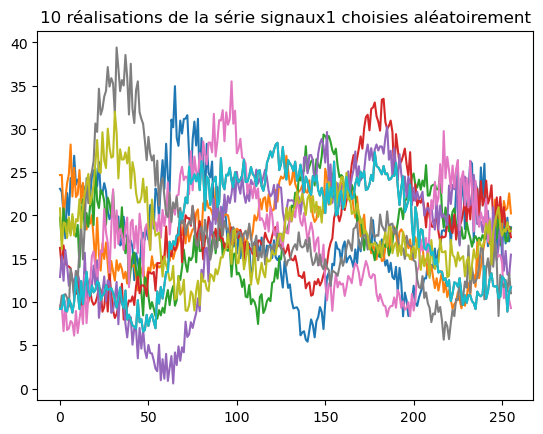

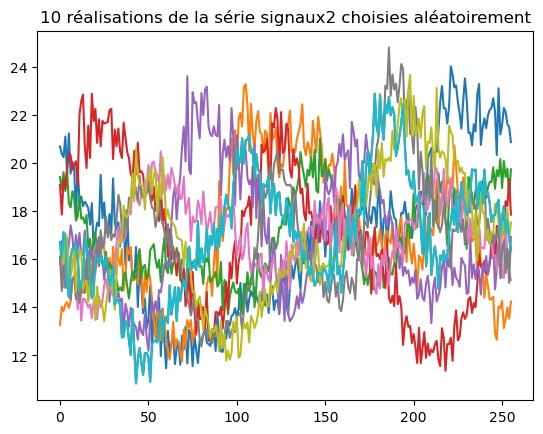

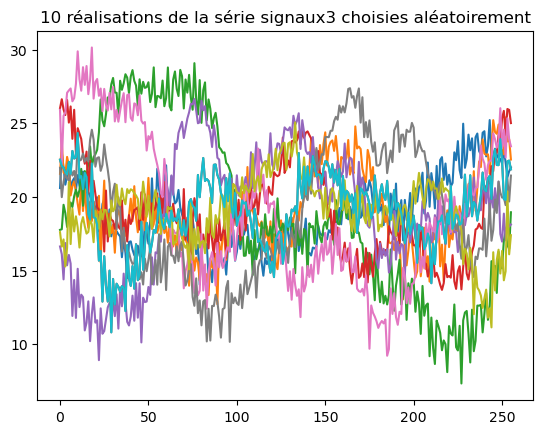

In [21]:
# Q1

# Paramètres modifiables :
nbRealisationsTracees = 10

# Corps :
nomsSignaux = ['signaux1','signaux2','signaux3']
indicesRealisations = np.random.randint(0,2048,size = nbRealisationsTracees)
data = np.load('signaux.npz')
for s in nomsSignaux :
    for i in indicesRealisations :
        plt.plot(data[s][:,i])
    plt.title(f'{nbRealisationsTracees} réalisations de la série {s} choisies aléatoirement')
    plt.show()


### Q1 :
Les trois processus semblent aléatoires, avec "deux niveaux de bruit" : il y a un bruit d'amplitude faible (disons d'amplitude 2) qui change du tout au tout entre un point d'échantillonage et le suivant (on dirait un processus markovien). 


On observe également une grande variabilité entre les réalisations du même processus aléatoire qui ressemble à un bruit autocorrélé sur des durées d'environ 100 (avec une amplitude bien plus grande, vers 10).
A ce stade, je ne saurais pas dire si les processus sont stationnaires ou non.

In [22]:
# Q2

for s in nomsSignaux:
    listDataS = []
    for i in range(len(data[s])):
        listDataS.extend(data[s][i]) # Concaténation des listes de valeurs
    avg = np.average(listDataS)
    aux = sum([(x-avg)**2 for x in  listDataS]) # Valeur intermédiaire pour simplifier l'écriture
    var = aux / (len(listDataS) - 1) # Variance débiaisée
    std = np.sqrt(var) # Ecart type
    print(f'Ecart-type de la série {s} : {std}')

Ecart-type de la série signaux1 : 6.512276086646949
Ecart-type de la série signaux2 : 2.8827153124352924
Ecart-type de la série signaux3 : 4.583259119509087


## Q3

Une série $X_{i}$ est stationnaire au sens faible lorsque les trois propriétés suivantes sont vérifiées :

P1. (Espérance) $E(X_{i})$ ne dépend pas de i

P2. (Variance) $Var(X_{i})$ ne dépend pas de i

P3. (Autocorrélation) $Cov(X_{i},X_{i-k})$ ne dépend que de k (pour tout i $\in$ [0,i-1]) 

Etudions les deux premiers moments des séries et leurs autocorrélations.


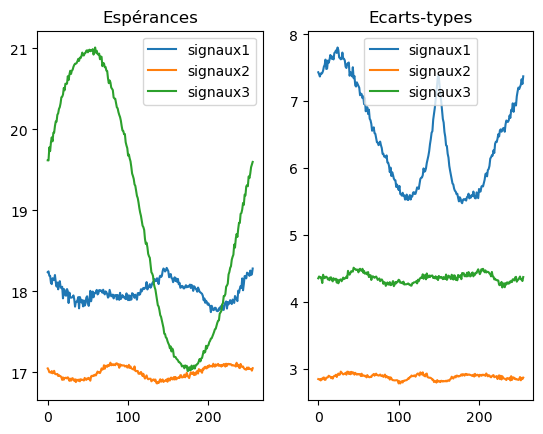

In [23]:
# Q3

fig, ax = plt.subplots(1,2)

for s in nomsSignaux :
    esperances, stds = [],[]
    for i in range(len(data[s])) :
        esperances.append(np.average(data[s][i]))
        stds.append(np.std(data[s][i]))
    ax[0].plot(esperances,label=s)
    ax[1].plot(stds,label=s)

ax[0].legend()
ax[0].title.set_text('Espérances')

ax[1].legend()
ax[1].title.set_text('Ecarts-types')

plt.show()


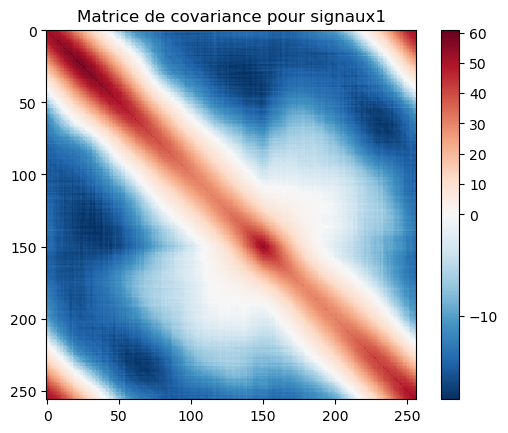

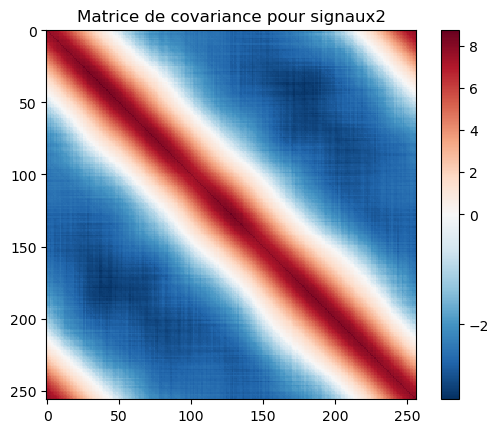

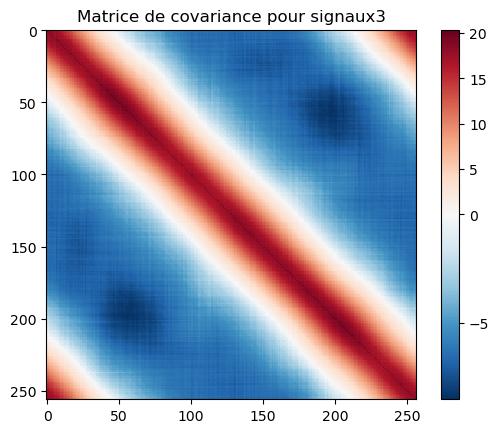

In [27]:
from matplotlib.colors import TwoSlopeNorm

for s in nomsSignaux :
    covariances = np.cov(data[s])
    plt.imshow(covariances)
    norm = TwoSlopeNorm(vmin=covariances.min(), vcenter=0, vmax=covariances.max())
    pc = plt.pcolormesh(covariances, norm=norm, cmap="RdBu_r")
    plt.colorbar(pc)
    plt.title(f'Matrice de covariance pour {s}')
    plt.show()



## Q3 (suite)

Nous avons représenté les espérances et écarts types des séries $X_i$ en fonction de i, ainsi que les matrices de corrélation des séries $X_i$. 

Il apparaît clairement que la série 3 n'est pas stationnaire (au sens faible) car son espérance n'est pas indépendante du temps. Précisément, la probabilité que cette série soit stationnaire sachant nos 2048 réalisations est très faible - on pourrait calculer une P-Valeur si on disposait de plus d'informations sur les phénomènes physiques sous-jacents. 

Au niveau des écarts-types, la série 1 sort du lot et présente des variations temporelles bien plus fortes que les deux autres.

Regardons enfin les matrices de covariance : la propriété P3 équivaut à ce que toute ligne parallèle à la diagonale de la matrice (sauf la diagonale elle_même) soit constante. (avec notre définition, c'est P2 qui équivaut à la constance de la diagonale) 
Ainsi, P3 est violée par la série 1, dont la matrice de covariance ne présente pas l'invariance souhaitée. Cela confirme que la série 1 n'est pas stationnaire.

En conclusion, la seule série stationnaire est la série 2.
